## A Morlet wavelet

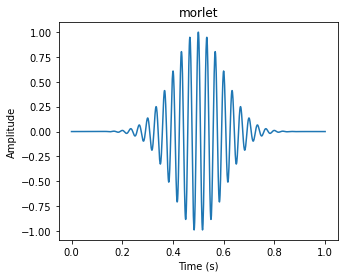

In [18]:
from ketos.audio.waveform import Waveform

wf = Waveform.morlet(rate=1000, frequency=30., width=0.1, displacement=0, samples=1000)

fig = wf.plot()

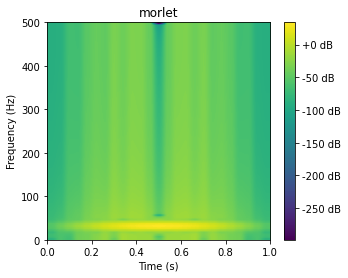

In [7]:
from ketos.audio.spectrogram import MagSpectrogram

spec = MagSpectrogram.from_waveform(audio=wf, window=0.2, step=0.04)

fig = spec.plot()

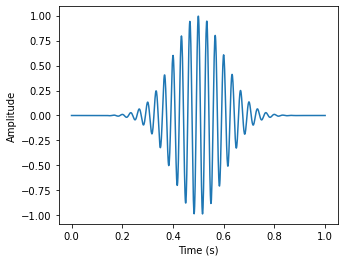

In [10]:
wf_r = spec.recover_waveform(num_iters=25)

fig = wf_r.plot()

## A Morlet wavelet shifted by 1/4 of the period

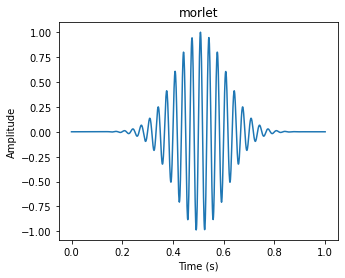

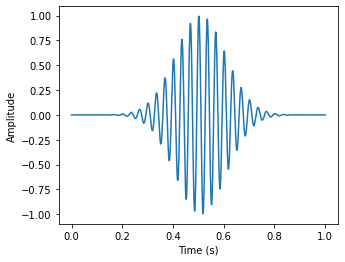

In [14]:
wf = Waveform.morlet(rate=1000, frequency=30., width=0.1, displacement=0.25/30., samples=1000)
spec = MagSpectrogram.from_waveform(audio=wf, window=0.2, step=0.04, compute_phase=True)
wf_r = spec.recover_waveform(num_iters=25, phase_angle=0)

fig = wf.plot()
fig = wf_r.plot()

## An S1 call

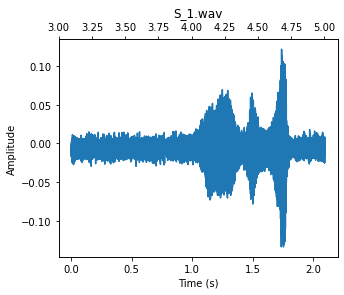

In [86]:
wf = Waveform.from_wav("S_1.wav", offset=3.0, duration=2.1, rate=44000)

fig = wf.plot()

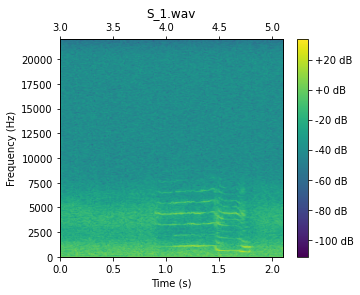

In [79]:
spec = MagSpectrogram.from_waveform(wf, window=0.040, step=0.010, freq_min=0, compute_phase=True)

fig = spec.plot()

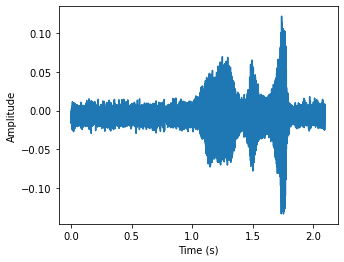

In [80]:
wf_r = spec.recover_waveform(num_iters=25)

fig = wf_r.plot()

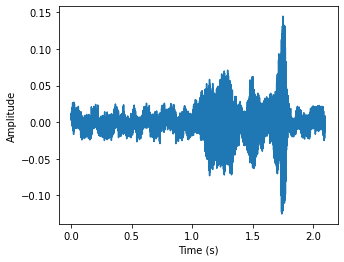

In [81]:
import numpy as np

phi = spec.get_phase_angle() 

phi += np.random.uniform(0, 2*np.pi, size=phi.shape) #add rndm distortion

wf_m = spec.recover_waveform(num_iters=25, phase_angle=phi)

fig = wf_m.plot()

In [82]:
y = wf.get_data()
y_r = wf_r.get_data()
y_m = wf_m.get_data()

err_r = np.std(y - y_r) / np.std(y)
err_m = np.std(y - y_m) / np.std(y)

print(f"Error using actual phase: {err_r:.2g}") 
print(f"Error using modified phase: {err_m:.2g}") 

Error using actual phase: 0.00095
Error using modified phase: 1.3


In [84]:
# listen to the waveforms
import IPython.display as ipd

ipd.clear_output()

ipd.display(ipd.Audio(data=wf.get_data(), rate=wf.rate))

ipd.display(ipd.Audio(data=wf_r.get_data(), rate=wf_r.rate))

ipd.display(ipd.Audio(data=wf_m.get_data(), rate=wf_m.rate))